In [263]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from pprint import pprint
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf = inf[(inf.level_no != 4)]  # & (inf.level_no != 0)
inf.shape, inf.columns


((24326, 42),
 Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_uuid', 'title',
        'reference_count', 'citation_count', 'influential_citation_count',
        'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
        'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
        'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'level_no',
        'similarity_with_l0', 'similarity_with_immediate_parent',
        'paper_type_label', 'path_from_root', 'similarity_with_l1',
        'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
        'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
        'influence_score', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality',
        'citation_count_standard_norm', 'age_standard_norm'],
       dtype='object'))

In [ ]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
# set_matplotlib_formats('svg')
# set_matplotlib_formats('svg')


In [ ]:
# inf[inf['title'].str.contains('Unsupervised Keyphrase Extraction')].sort_values(
#     'similarity_with_l0')[['similarity_with_l0','title']]


## Stats

### Data Usage

In [243]:
kp = pd.read_csv("data/info/key_phrases_extracted.csv", usecols=['paper_id'])
already_extracted = kp.paper_id.unique().tolist()
already_extracted_len = len(already_extracted)
already_extracted_len


6818

In [3]:
unused = 66
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf")]
Pdfs_downloaded = len(pdf_files_id_list) + unused
Pdfs_downloaded


7634

In [4]:
paper_covers_by_extracted_key_phrases = inf[inf['paper_id'].isin(already_extracted)]
paper_covers_by_extracted_key_phrases_len = paper_covers_by_extracted_key_phrases.shape[0]
total_papers_duplicates_as_unique = inf.shape[0]
total_unique_papers = inf['paper_id'].nunique()
print(f"Total Papers considering each duplicates as unique:{total_papers_duplicates_as_unique} papers")
print(f"Total Unique Papers: {total_unique_papers}",)
print(f"Total Papers downloaded[pdf]: {Pdfs_downloaded}",)
print(f"Successfully KeyPhrases Extracted Papers: {already_extracted_len}")
print(f"Considering duplicates, KeyPhrases Extracted Papers covers: {paper_covers_by_extracted_key_phrases_len }, {paper_covers_by_extracted_key_phrases_len/total_papers_duplicates_as_unique*100:.2f}% of total papers")


Total Papers considering each duplicates as unique:24326 papers
Total Unique Papers: 9269
Total Papers downloaded[pdf]: 7634
Successfully KeyPhrases Extracted Papers: 6818
Considering duplicates, KeyPhrases Extracted Papers covers: 17279, 71.03% of total papers


In [38]:
inf.level_no.value_counts().sort_index()


0        1
1       39
2     1037
3    23249
Name: level_no, dtype: int64

In [39]:
inf.groupby('level_no').size()


level_no
0        1
1       39
2     1037
3    23249
dtype: int64

In [240]:
import pickle
from graph.graph_info import GraphManager, InfoManager

def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)

def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

g: GraphManager = GraphManager()
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g = g_serialized
g.inf.shape


(24387, 29)

In [248]:
for i, level_iTh_papers_ids in enumerate(g.levelOrderList):
	if i ==4:
		break
	print(f"{('*'*5)} level {i}  {('*'*5)}")
	print(f"total papers: {len(level_iTh_papers_ids)}")
	downloaded_papers = []
	converted = []
	keyPhraseExtracted = []

	for paper in level_iTh_papers_ids:
		paper_id = paper['paper_id']
		# if paper_id in pdf_files_id_list:
		# 	downloaded_papers.append(paper)
		if paper_id in already_extracted:
			keyPhraseExtracted.append(paper)
	print(f"key-phrase extracted:{len(keyPhraseExtracted)}")
	print(
		f"key-phrase extraction percentage in {i} level: {round(len(keyPhraseExtracted)/len(level_iTh_papers_ids),2)}%")


***** level 0  *****
total papers: 1
key-phrase extracted:1
key-phrase extraction percentage in 0 level: 1.0%
***** level 1  *****
total papers: 39
key-phrase extracted:33
key-phrase extraction percentage in 1 level: 0.85%
***** level 2  *****
total papers: 1037
key-phrase extracted:806
key-phrase extraction percentage in 2 level: 0.78%
***** level 3  *****
total papers: 23249
key-phrase extracted:16439
key-phrase extraction percentage in 3 level: 0.71%


### Duplicate Data

In [3]:
duplicateRowsCount = inf[inf.duplicated(['paper_id'])].groupby(
    "paper_id").size().sort_values(ascending=False)

print(duplicateRowsCount.shape[0])
dup_df = inf[inf['paper_id'].isin(duplicateRowsCount.index)].drop_duplicates(
    subset=['paper_id'])
dup_df['dup_count'] = np.nan
dup_df.shape

3031


(3031, 43)

In [4]:
duplicateRowsCount

paper_id
591394cfab5879934a59f6c44f03b6c4009042f0    184
10d6778bc45aebcd58d336b4062b935861d2fe8a    160
9a12ac1e3b51f30042abdadc5636c88d41bf0ca7    160
771ca13f78a6cfda9ed99004a386e9e7e187bd34    144
7b95d389bc6affe6a127d53b04bcfd68138f1a1a    135
                                           ... 
923db0aeb26a6dc1cb42069c9db04e5dd2d2200a      1
9221ab4b7c890434cb5cc3d56d0a582dac52ea70      1
24b20f7b118588055346f4ac5cdb1fe22e886dda      1
24c0da4bf293ffd6adc0babad37de445977c8267      1
0025b963134b1c0b64c1389af19610d038ab7072      1
Length: 3031, dtype: int64

In [5]:
duplicateRowsCountDic = duplicateRowsCount.to_dict()

In [7]:
for index, row in dup_df.iterrows():
	dup_count = row["dup_count"]
	dup_df.at[index, "dup_count"] = duplicateRowsCountDic[row["paper_id"]]


In [8]:
dup_df.sort_values(by=['dup_count'], ascending=False).head(3)


,uuid,paper_id,parent_id,parent_paper_uuid,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l2_em,similarity_with_immediate_parent_em,influence_score,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality,citation_count_standard_norm,age_standard_norm,dup_count
18,40439042-e2b0-44af-aeb9-68c8d1473264,591394cfab5879934a59f6c44f03b6c4009042f0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Learning Algorithms for Keyphrase Extraction,78,875,63,2000.0,Article,...,NaN,0.744783,0.553604,0.006361,0.004528,9.164623e-07,0.000360,-0.087249,-0.392929,184.0
217,523c2ffa-2b77-4937-9bba-ceab3cdd3e20,10d6778bc45aebcd58d336b4062b935861d2fe8a,6f813e6b-d731-4cbc-b721-17c05bdcd8e3,26092619b8be8f0048172bb52bc07b36129b579e,The Anatomy of a Large-Scale Hypertextual Web ...,18,15689,1798,1998.0,Article,...,NaN,0.512808,0.511631,0.008194,0.001509,8.611481e-02,0.000088,1.363748,-0.219984,160.0
53,39d59b01-2268-43a2-8283-4c3daa1d6ca1,9a12ac1e3b51f30042abdadc5636c88d41bf0ca7,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,KEA: practical automatic keyphrase extraction,29,1005,130,1999.0,Conference Paper,...,NaN,0.769029,0.541297,0.007224,0.001617,9.165261e-07,0.000186,-0.074516,-0.306456,160.0


In [34]:
dup_df.columns


Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_uuid', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'influence_score', 'in_deg_centrality', 'out_deg_centrality',
       'eigenvector_centrality', 'load_centrality',
       'citation_count_standard_norm', 'age_standard_norm', 'dup_count'],
      dtype='object')

<AxesSubplot:xlabel='dup_count', ylabel='in_deg_centrality'>

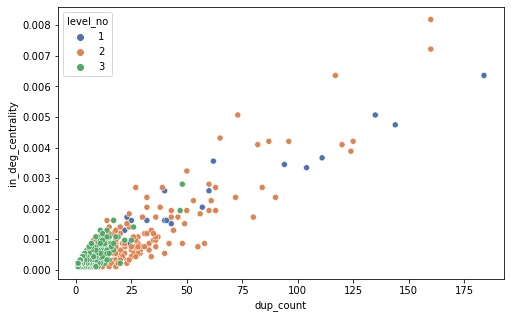

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='in_deg_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='out_deg_centrality'>

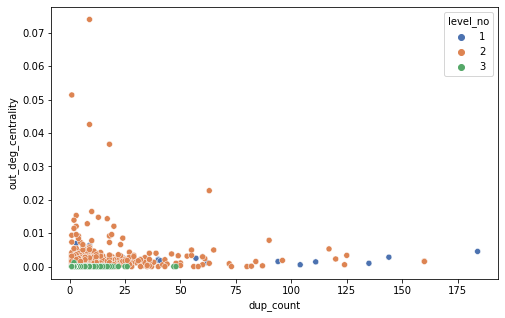

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='dup_count', y='out_deg_centrality',
                data=dup_df, hue='level_no', palette="deep")


<AxesSubplot:xlabel='dup_count', ylabel='degree_centrality'>

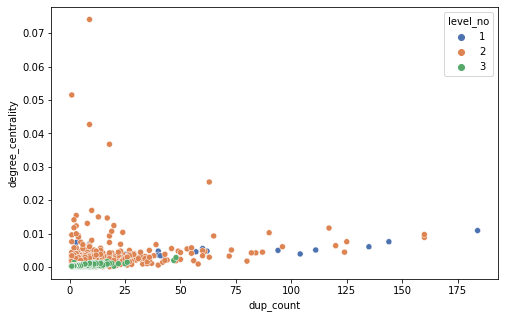

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='degree_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='closeness_centrality'>

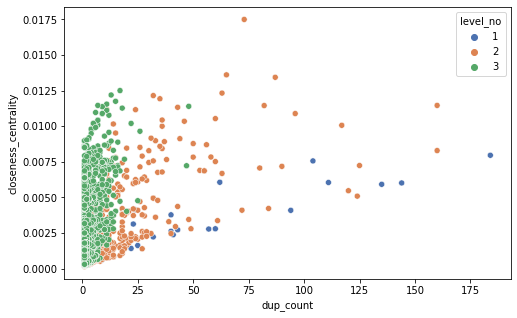

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='closeness_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='betweenness_centrality'>

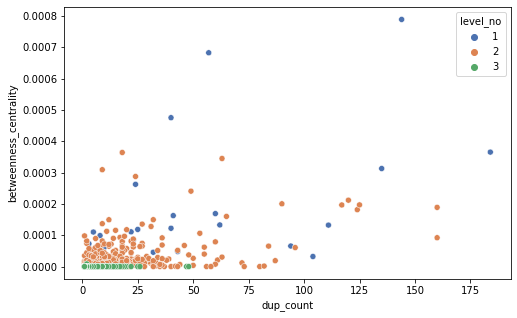

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='betweenness_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='eigenvector_centrality'>

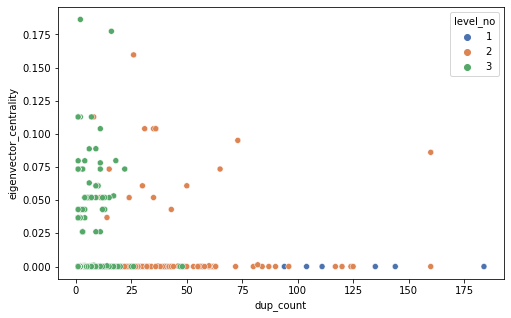

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='eigenvector_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='load_centrality'>

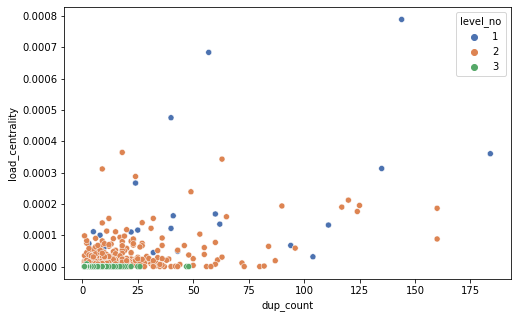

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='load_centrality', data=dup_df,hue='level_no',palette="deep")

In [12]:
cols = ['dup_count', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality']
g = sns.PairGrid(dup_df, hue='level_no', vars=cols)

# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
plt.savefig("plots/dup_count_vs_centrality.png",format='png', dpi=1200)
plt.savefig("plots/dup_count_vs_centrality.svg",format='svg', dpi=1200)

### Summary

In [264]:
inf = inf[inf.level_no != 0]
inf.shape


(24325, 42)

In [266]:
inf_num = inf.select_dtypes(include=['number'])
inf_num.fillna(0, inplace=True)
inf_num.columns


Index(['reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'age', 'citation_count_min_max_norm',
       'age_min_max_norm', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'level_no', 'similarity_with_l0',
       'similarity_with_immediate_parent', 'paper_type_label',
       'similarity_with_l1', 'similarity_with_l2', 'similarity_with_l0_em',
       'similarity_with_l1_em', 'similarity_with_l2_em',
       'similarity_with_immediate_parent_em', 'influence_score',
       'in_deg_centrality', 'out_deg_centrality', 'eigenvector_centrality',
       'load_centrality', 'citation_count_standard_norm', 'age_standard_norm'],
      dtype='object')

<AxesSubplot:>

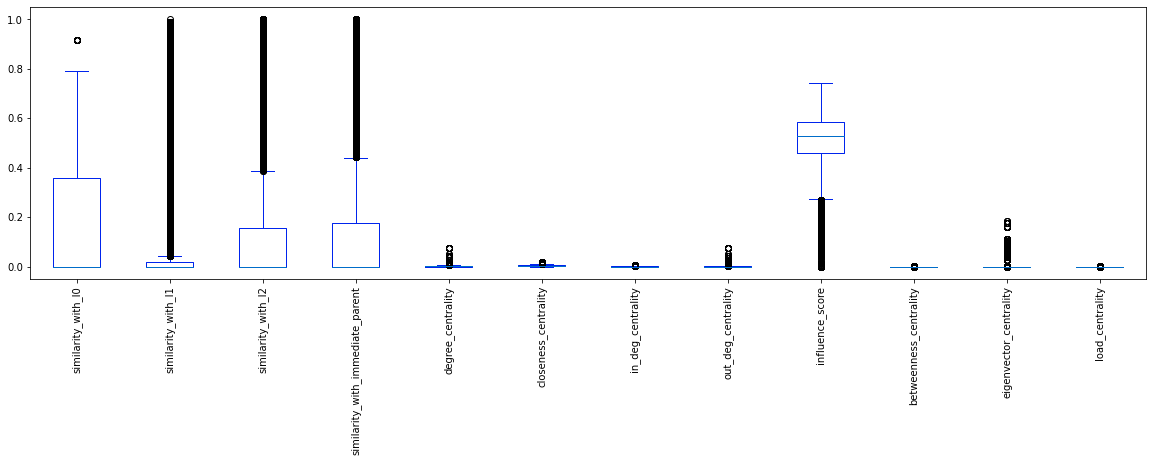

In [267]:
cols = ['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2','similarity_with_immediate_parent', 'degree_centrality',
        'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'influence_score', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']
inf_num[cols].plot.box(figsize=(20,5), rot=90)

<AxesSubplot:>

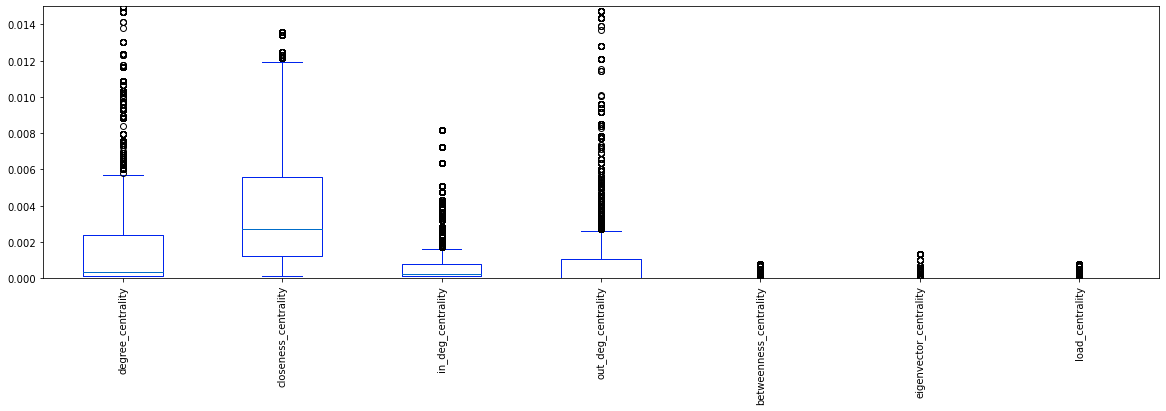

In [268]:
cols = ['degree_centrality', 'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']
inf_num[cols].plot.box(figsize=(20,5), rot=90,ylim=(0,0.015))

In [288]:
cols = ['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2', 'degree_centrality',
        'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'influence_score', 'similarity_with_immediate_parent',
        'betweenness_centrality', 'eigenvector_centrality', 'load_centrality'
        ]


In [85]:
# X_with_level = inf_num[cols]
# X_without_level = X_with_level.drop(['level_no'], axis=1)


<AxesSubplot:>

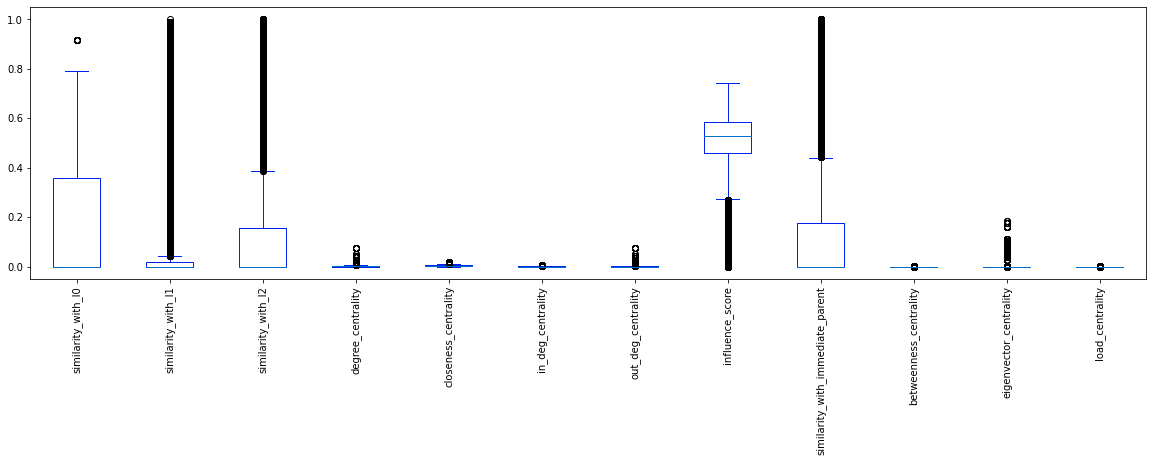

In [289]:
inf_num[cols].plot.box(figsize=(20,5), rot=90)

<AxesSubplot:>

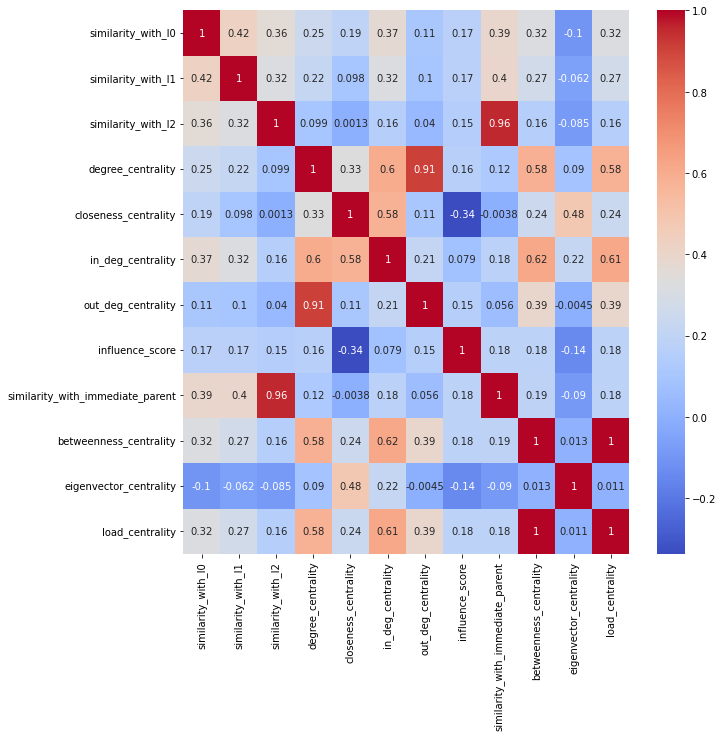

In [290]:
plt.figure(figsize=(10, 10))
sns.heatmap(inf_num[cols].corr(), annot=True, cmap='coolwarm')


In [291]:
corr_matrix = inf_num[cols].corr()


In [292]:
feature = 'similarity_with_l0'
corr_matrix[feature][corr_matrix[feature] > 0.3]


similarity_with_l0                  1.000000
similarity_with_l1                  0.420450
similarity_with_l2                  0.361763
in_deg_centrality                   0.369759
similarity_with_immediate_parent    0.394159
betweenness_centrality              0.318488
load_centrality                     0.317805
Name: similarity_with_l0, dtype: float64

In [293]:
feature = 'degree_centrality'
corr_matrix[feature][corr_matrix[feature] > 0.3]


degree_centrality         1.000000
closeness_centrality      0.333930
in_deg_centrality         0.598640
out_deg_centrality        0.910014
betweenness_centrality    0.583872
load_centrality           0.581680
Name: degree_centrality, dtype: float64

<AxesSubplot:>

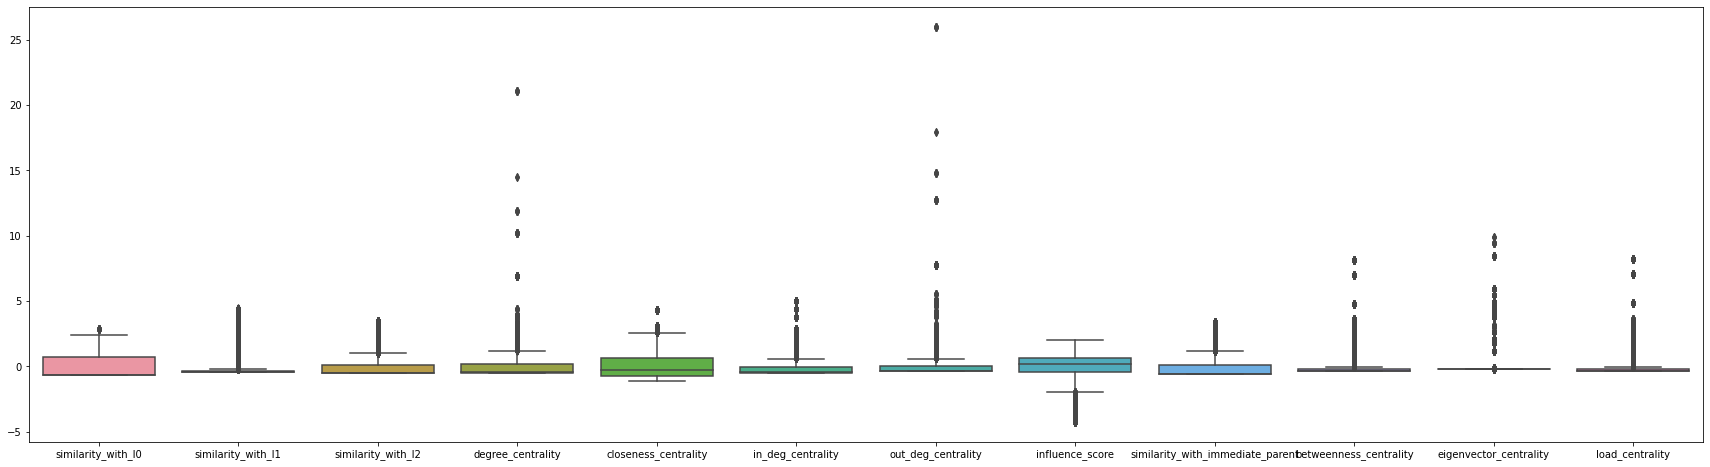

In [294]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(inf_num[cols])

X_scaled = pd.DataFrame(X_scaled, columns=inf_num[cols].columns)
sns.set_palette("winter")
fig,ax = plt.subplots(figsize=(30, 8))
# ax.set_ylim(-5,5)
sns.boxplot(data=X_scaled)
# X_scaled.plot.box(figsize=(20,5), rot=90)

In [295]:
X_scaled['level_no'] = inf['level_no']


## Level Wise Similarity

### semantic similarity

In [47]:
inf = inf[inf.level_no != 0]
inf.shape

(24325, 42)

In [51]:
selectedDf = inf[['level_no', 'similarity_with_l0', 'similarity_with_l1',
                   'similarity_with_l2', 'similarity_with_immediate_parent']]
display(selectedDf.head(3))

melteddf = selectedDf.melt(
    'level_no', var_name='similarities', value_name='score')
display(melteddf)


,level_no,similarity_with_l0,similarity_with_l1,similarity_with_l2,similarity_with_immediate_parent
1,1,0.644213,NaN,NaN,0.644213
2,1,0.349922,NaN,NaN,0.349922
3,1,0.044418,NaN,NaN,0.044418


,level_no,similarities,score
0,1,similarity_with_l0,0.644213
1,1,similarity_with_l0,0.349922
2,1,similarity_with_l0,0.044418
3,1,similarity_with_l0,0.646379
4,1,similarity_with_l0,0.582610
...,...,...,...
97295,3,similarity_with_immediate_parent,NaN
97296,3,similarity_with_immediate_parent,NaN
97297,3,similarity_with_immediate_parent,NaN
97298,3,similarity_with_immediate_parent,NaN


<AxesSubplot:xlabel='similarities', ylabel='score'>

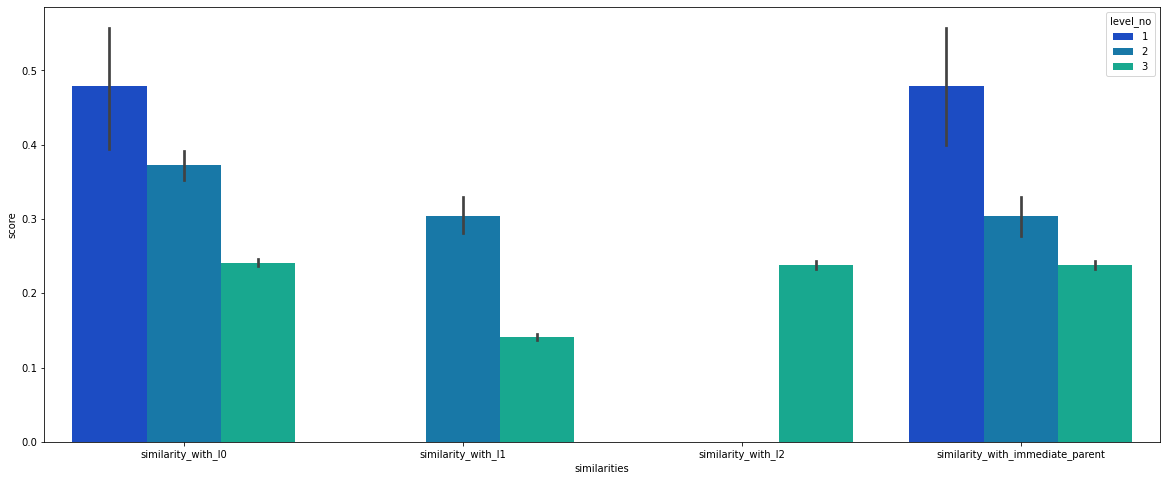

In [117]:
plt.figure(figsize=(20, 8))
sns.barplot(data=melteddf, x="similarities", y="score",
            hue='level_no', palette="winter")


In [118]:
level_wise_similarity_mean = inf.groupby('level_no')[['similarity_with_l0', 'similarity_with_l1',
                         'similarity_with_l2']].mean().reset_index()
level_wise_similarity_mean


,level_no,similarity_with_l0,similarity_with_l1,similarity_with_l2
0,1,0.478722,NaN,NaN
1,2,0.372125,0.303997,NaN
2,3,0.241313,0.141705,0.237853


In [90]:
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt('level_no', var_name='similarities_with', value_name='score')
level_wise_similarity_mean_melted

,level_no,similarities_with,score
0,1,similarity_with_l0,0.478722
1,2,similarity_with_l0,0.372125
2,3,similarity_with_l0,0.241313
3,1,similarity_with_l1,NaN
4,2,similarity_with_l1,0.303997
5,3,similarity_with_l1,0.141705
6,1,similarity_with_l2,NaN
7,2,similarity_with_l2,NaN
8,3,similarity_with_l2,0.237853


<AxesSubplot:xlabel='similarities_with', ylabel='score'>

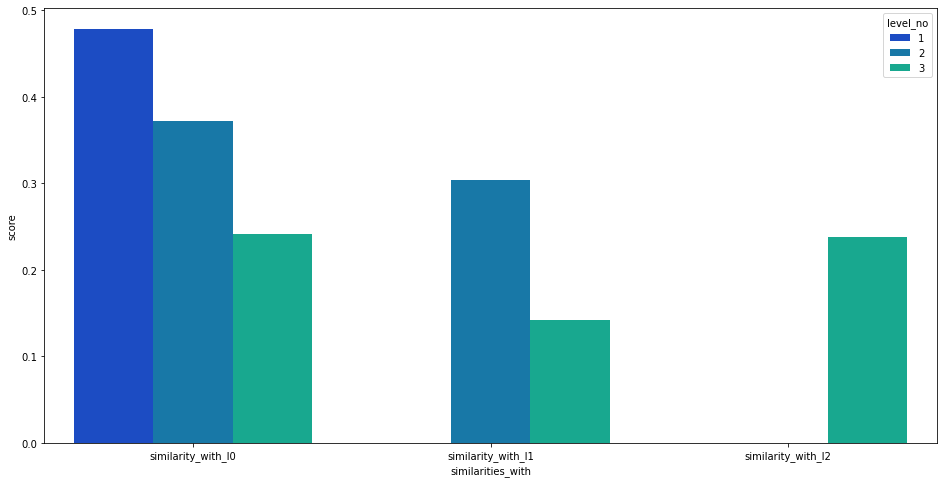

In [121]:
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")

### Centrality

In [122]:
inf.columns

Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_uuid', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'influence_score', 'in_deg_centrality', 'out_deg_centrality',
       'eigenvector_centrality', 'load_centrality',
       'citation_count_standard_norm', 'age_standard_norm'],
      dtype='object')

In [216]:
level_wise_similarity_mean = inf.groupby('level_no')[['degree_centrality',
                                                      'closeness_centrality', 'betweenness_centrality',
                                                      'in_deg_centrality', 'out_deg_centrality',
                                                      'eigenvector_centrality', 'load_centrality'

													  ]].mean().reset_index()
level_wise_similarity_mean


,level_no,degree_centrality,closeness_centrality,betweenness_centrality,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality
0,1,0.004302,0.002090,0.000119,0.001429,0.002872,2.016355e-07,0.000119
1,2,0.003797,0.003250,0.000073,0.001375,0.002422,2.574623e-03,0.000073
2,3,0.001658,0.003676,0.000029,0.000830,0.000828,4.415869e-03,0.000028


In [124]:
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt('level_no', var_name='similarities_with', value_name='score')
level_wise_similarity_mean_melted

,level_no,similarities_with,score
0,1,degree_centrality,4.301610e-03
1,2,degree_centrality,3.797290e-03
2,3,degree_centrality,1.658278e-03
3,1,closeness_centrality,2.090281e-03
4,2,closeness_centrality,3.249703e-03
5,3,closeness_centrality,3.675689e-03
6,1,betweenness_centrality,1.194653e-04
7,2,betweenness_centrality,7.300640e-05
8,3,betweenness_centrality,2.851729e-05
9,1,in_deg_centrality,1.429263e-03


<AxesSubplot:xlabel='similarities_with', ylabel='score'>

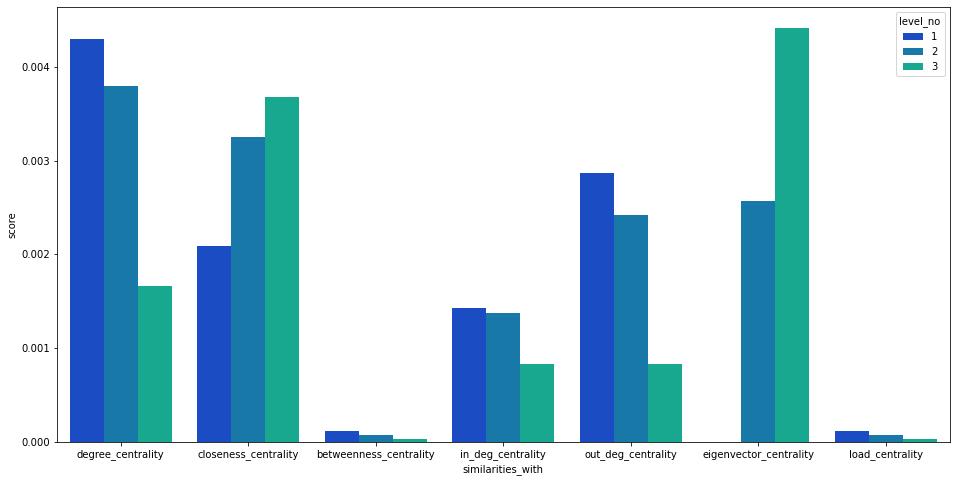

In [126]:
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")

### Sim + Centrality

<AxesSubplot:xlabel='similarities_with', ylabel='score'>

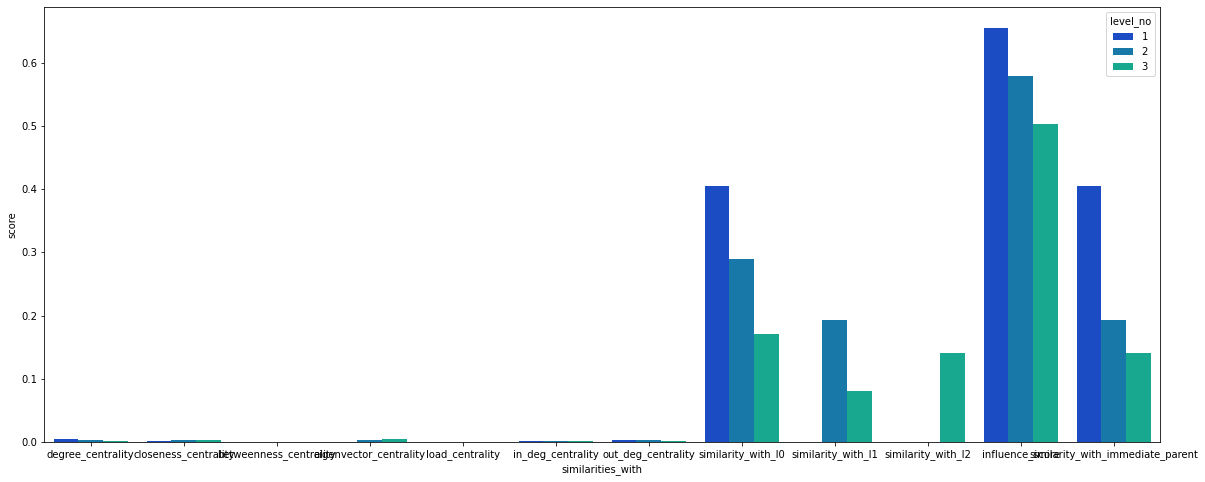

In [296]:
level_wise_similarity_mean = inf_num.groupby('level_no')[['degree_centrality',
                                                           'closeness_centrality',
                                                          'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
                                                           'in_deg_centrality', 'out_deg_centrality',
                                                           'similarity_with_l0', 'similarity_with_l1',
                                                           'similarity_with_l2', 'influence_score',
                                                              'similarity_with_immediate_parent'
                                                           ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
# level_wise_similarity_mean_melted
plt.figure(figsize=(20, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")

<AxesSubplot:xlabel='similarities_with', ylabel='score'>

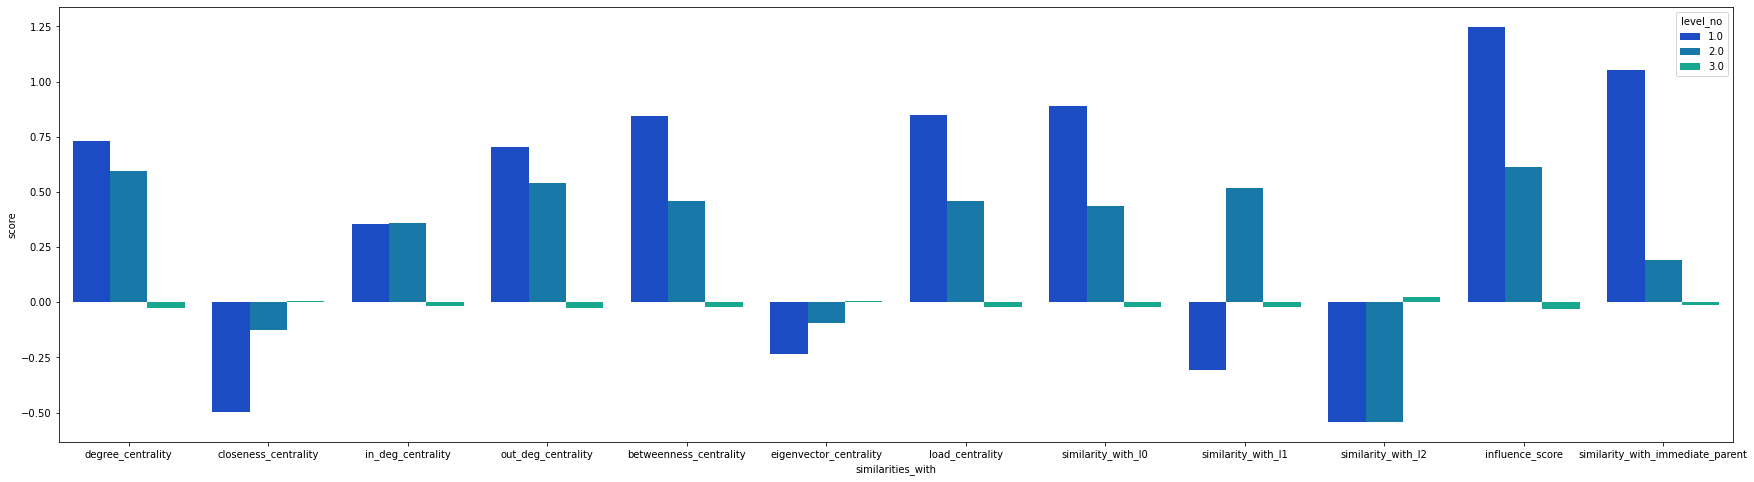

In [297]:
level_wise_similarity_mean = X_scaled.groupby('level_no')[['degree_centrality',
                                                      'closeness_centrality',
                                                      'in_deg_centrality', 'out_deg_centrality',
                                                    'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
                                                      'similarity_with_l0', 'similarity_with_l1',
                                                      'similarity_with_l2', 'influence_score',
                                                      'similarity_with_immediate_parent'
                                                      ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
# level_wise_similarity_mean_melted
plt.figure(figsize=(30, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")

## Feature Engineering

### Aggregate All

#### without scaling

In [30]:
inf = inf[inf.level_no != 0]
inf.shape


(24325, 42)

In [8]:
infsum = inf[['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2', 'degree_centrality', 'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'influence_score','level_no']]
infsum.fillna(0, inplace=True)


C:\Users\soiko\AppData\Local\Temp\ipykernel_21208\1449173383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infsum.fillna(0, inplace=True)


In [9]:
infsum


,similarity_with_l0,similarity_with_l1,similarity_with_l2,degree_centrality,closeness_centrality,in_deg_centrality,out_deg_centrality,influence_score,level_no
1,0.644213,0.0,0.0,0.004744,0.002620,0.002588,0.002156,0.674783,1
2,0.349922,0.0,0.0,0.006469,0.000108,0.000108,0.006361,0.722739,1
3,0.044418,0.0,0.0,0.002588,0.000108,0.000108,0.002480,0.633800,1
4,0.646379,0.0,0.0,0.006900,0.000627,0.000539,0.006361,0.711445,1
5,0.582610,0.0,0.0,0.004960,0.004093,0.003450,0.001509,0.641479,1
...,...,...,...,...,...,...,...,...,...
24321,0.000000,0.0,0.0,0.000108,0.000842,0.000108,0.000000,0.582255,3
24322,0.000000,0.0,0.0,0.000108,0.000842,0.000108,0.000000,0.584535,3
24323,0.000000,0.0,0.0,0.000108,0.000842,0.000108,0.000000,0.481187,3
24324,0.000000,0.0,0.0,0.000108,0.000842,0.000108,0.000000,0.364396,3


In [10]:
infsum['agg_all'] = infsum['similarity_with_l0'] + infsum['similarity_with_l1'] + infsum['similarity_with_l2'] + infsum['influence_score'] + infsum['degree_centrality'] + infsum['closeness_centrality'] + infsum['in_deg_centrality'] + infsum['out_deg_centrality']
infsum.head()


C:\Users\soiko\AppData\Local\Temp\ipykernel_21208\3683033573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infsum['agg_all'] = infsum['similarity_with_l0'] + infsum['similarity_with_l1'] + infsum['similarity_with_l2'] + infsum['influence_score'] + infsum['degree_centrality'] + infsum['closeness_centrality'] + infsum['in_deg_centrality'] + infsum['out_deg_centrality']


,similarity_with_l0,similarity_with_l1,similarity_with_l2,degree_centrality,closeness_centrality,in_deg_centrality,out_deg_centrality,influence_score,level_no,agg_all
1,0.644213,0.0,0.0,0.004744,0.002620,0.002588,0.002156,0.674783,1,1.331103
2,0.349922,0.0,0.0,0.006469,0.000108,0.000108,0.006361,0.722739,1,1.085707
3,0.044418,0.0,0.0,0.002588,0.000108,0.000108,0.002480,0.633800,1,0.683500
4,0.646379,0.0,0.0,0.006900,0.000627,0.000539,0.006361,0.711445,1,1.372252
5,0.582610,0.0,0.0,0.004960,0.004093,0.003450,0.001509,0.641479,1,1.238101


<AxesSubplot:xlabel='level_no'>

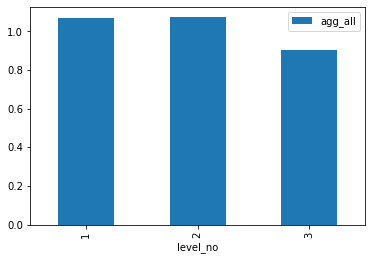

In [11]:
infsum_info = infsum.groupby('level_no')[['agg_all']].mean().reset_index()


infsum_info.plot(x='level_no', y='agg_all', kind='bar')


In [12]:
cols = ['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2', 'degree_centrality', 'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'influence_score']

In [40]:
level_3 = inf[inf['level_no']==3]
level_3_topk = level_3.sort_values(by="similarity_with_l0", ascending=False)[
    cols].head(100)
level_3_topk.fillna(0, inplace=True)
level_3_topk[:2]


,similarity_with_l0,similarity_with_l1,similarity_with_l2,degree_centrality,closeness_centrality,in_deg_centrality,out_deg_centrality,influence_score
1863,0.918598,0.341595,0.784631,0.003774,0.001416,0.001294,0.00248,0.675130
20676,0.918598,0.807839,0.782175,0.003774,0.001416,0.001294,0.00248,0.675112


In [41]:
level_3_topk['agg_all'] = level_3_topk['similarity_with_l0'] + level_3_topk['similarity_with_l1'] + level_3_topk['similarity_with_l2'] + level_3_topk['influence_score'] +level_3_topk['degree_centrality'] + level_3_topk['closeness_centrality'] + level_3_topk['in_deg_centrality'] + level_3_topk['out_deg_centrality']
level_3_topk['agg_all'] = level_3_topk['agg_all']/ 8
level_3_topk.head()


,similarity_with_l0,similarity_with_l1,similarity_with_l2,degree_centrality,closeness_centrality,in_deg_centrality,out_deg_centrality,influence_score,agg_all
1863,0.918598,0.341595,0.784631,0.003774,0.001416,0.001294,0.00248,0.675130,0.341115
20676,0.918598,0.807839,0.782175,0.003774,0.001416,0.001294,0.00248,0.675112,0.399086
9940,0.918598,0.846925,0.784631,0.003774,0.001416,0.001294,0.00248,0.675112,0.404279
6348,0.918598,0.784631,0.810182,0.003774,0.001416,0.001294,0.00248,0.675130,0.399688
19527,0.918598,0.000000,0.784631,0.003774,0.001416,0.001294,0.00248,0.675112,0.298413


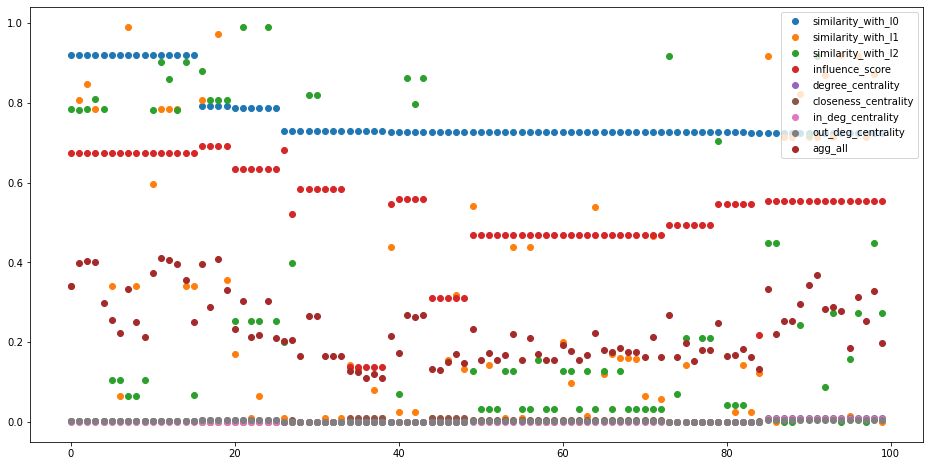

In [42]:
x = np.arange(len(level_3_topk))
plt.figure(figsize=(16, 8))
plt.scatter(x, level_3_topk['similarity_with_l0'],
          label='similarity_with_l0')
plt.scatter(x, level_3_topk['similarity_with_l1'],
          label='similarity_with_l1')
plt.scatter(x, level_3_topk['similarity_with_l2'],
          label='similarity_with_l2')
plt.scatter(x, level_3_topk['influence_score'],
         label='influence_score')
plt.scatter(x, level_3_topk['degree_centrality'],
         label='degree_centrality')
plt.scatter(x, level_3_topk['closeness_centrality'],
          label='closeness_centrality')
plt.scatter(x, level_3_topk['in_deg_centrality'],
         label='in_deg_centrality')
plt.scatter(x, level_3_topk['out_deg_centrality'],
         label='out_deg_centrality')
plt.scatter(x, level_3_topk['agg_all'], color='brown', label='agg_all')
plt.legend(loc='upper right')


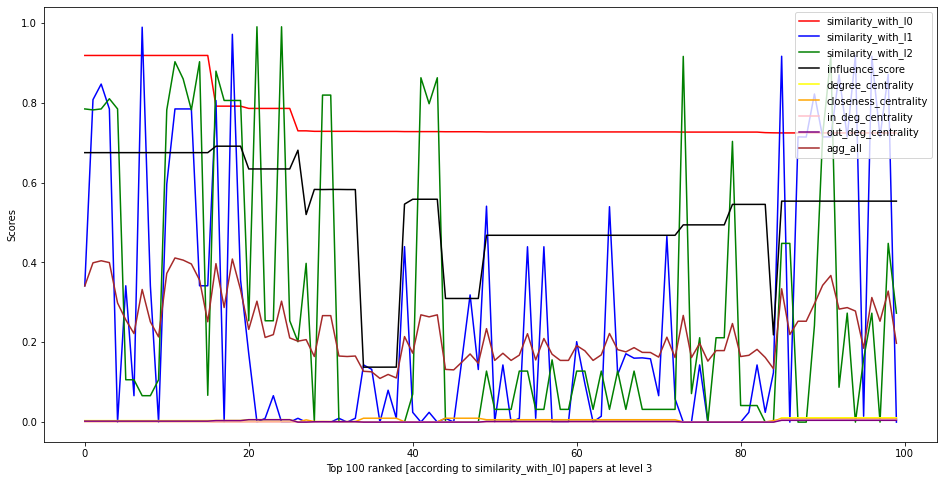

In [43]:
x = np.arange(len(level_3_topk))
fig,ax=plt.subplots(figsize=(16, 8))
plt.plot(x, level_3_topk['similarity_with_l0'], color='red', label='similarity_with_l0')
plt.plot(x, level_3_topk['similarity_with_l1'], color='blue', label='similarity_with_l1')
plt.plot(x, level_3_topk['similarity_with_l2'], color='green', label='similarity_with_l2')
plt.plot(x, level_3_topk['influence_score'], color='black', label='influence_score')
plt.plot(x, level_3_topk['degree_centrality'], color='yellow', label='degree_centrality')
plt.plot(x, level_3_topk['closeness_centrality'], color='orange', label='closeness_centrality')
plt.plot(x, level_3_topk['in_deg_centrality'],
         color='pink', label='in_deg_centrality')
plt.plot(x, level_3_topk['out_deg_centrality'], color='purple', label='out_deg_centrality')
plt.plot(x, level_3_topk['agg_all'], color='brown', label='agg_all')
plt.xlabel('Top 100 ranked [according to similarity_with_l0] papers at level 3 ')
plt.ylabel('Scores')
plt.legend(loc ='upper right')
fig.set_facecolor('white')
plt.savefig('level_3_topk.png' , dpi=400)

#### with scaling 

In [318]:
X_scaled_Agg = X_scaled.copy()


In [319]:
sum_cols = ['degree_centrality', 'out_deg_centrality',
            'betweenness_centrality', 'load_centrality',
            'similarity_with_l0', 'influence_score',
            'similarity_with_immediate_parent'
            ]
# X_scaled_Agg = X_scaled_Agg


In [320]:
X_scaled_Agg['Sum'] = X_scaled[sum_cols].sum(axis=1)
X_scaled_Agg['Sum'] = X_scaled_Agg['Sum'] / len(sum_cols)
X_scaled_Agg


,similarity_with_l0,similarity_with_l1,similarity_with_l2,degree_centrality,closeness_centrality,in_deg_centrality,out_deg_centrality,influence_score,similarity_with_immediate_parent,betweenness_centrality,eigenvector_centrality,load_centrality,level_no,Sum
0,1.811142,-0.416602,-0.54362,0.870579,-0.323105,1.189375,0.446398,1.415389,1.968151,4.794454,-0.235964,4.813539,NaN,2.302807
1,0.672619,-0.416602,-0.54362,1.372817,-1.107308,-0.512237,1.939742,1.819337,0.811064,-0.286272,-0.235964,-0.285017,1.0,0.863470
2,-0.509287,-0.416602,-0.54362,0.242781,-1.107308,-0.512237,0.561271,1.070174,-0.390112,-0.300280,-0.235964,-0.299037,1.0,0.053644
3,1.819523,-0.416602,-0.54362,1.498376,-0.945144,-0.216305,1.939742,1.724200,1.976668,0.157739,-0.235964,0.159781,1.0,1.325147
4,1.572820,-0.416602,-0.54362,0.933359,0.136628,1.781241,0.216653,1.134860,1.725943,0.377163,-0.235964,0.400264,1.0,0.908723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24320,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,0.636001,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.295193
24321,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,0.655203,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.292450
24322,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,-0.215323,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.416810
24323,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,-1.199078,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.557347


In [322]:
level_3 = X_scaled_Agg[X_scaled_Agg['level_no'] == 3]
level_3_topk = level_3.sort_values(
    by="similarity_with_l0", ascending=False)[sum_cols + ['Sum']].head(100)
level_3_topk.fillna(0, inplace=True)
level_3_topk[:2]


,degree_centrality,out_deg_centrality,betweenness_centrality,load_centrality,similarity_with_l0,influence_score,similarity_with_immediate_parent,Sum
1862,0.58807,0.561271,0.865214,0.86477,2.872659,1.418309,2.520246,1.384363
9939,0.58807,0.561271,0.865214,0.86477,2.872659,1.418155,2.520246,1.384341


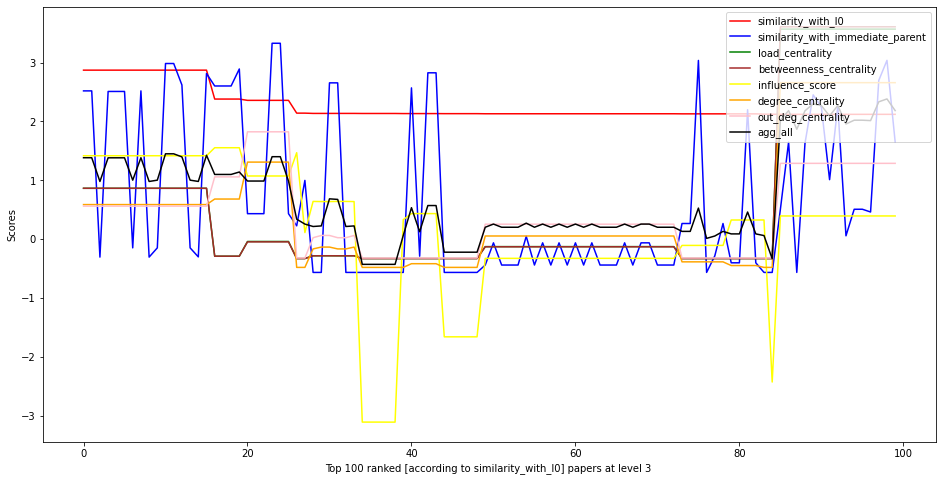

In [326]:
x = np.arange(len(level_3_topk))
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(x, level_3_topk['similarity_with_l0'], label='similarity_with_l0', color='red')
plt.plot(x, level_3_topk['similarity_with_immediate_parent'],label='similarity_with_immediate_parent' , color='blue')
plt.plot(x, level_3_topk['load_centrality'],label='load_centrality' , color='green')
plt.plot(x, level_3_topk['betweenness_centrality'],label='betweenness_centrality' , color='brown')
plt.plot(x, level_3_topk['influence_score'],label='influence_score' , color='yellow')
plt.plot(x, level_3_topk['degree_centrality'],label='degree_centrality' , color='orange')
plt.plot(x, level_3_topk['out_deg_centrality'],label='out_deg_centrality' , color='pink')
plt.plot(x, level_3_topk['Sum'],label='agg_all' , color='black')
plt.xlabel(
    'Top 100 ranked [according to similarity_with_l0] papers at level 3 ')
plt.ylabel('Scores')
plt.legend(loc='upper right')
fig.set_facecolor('white')


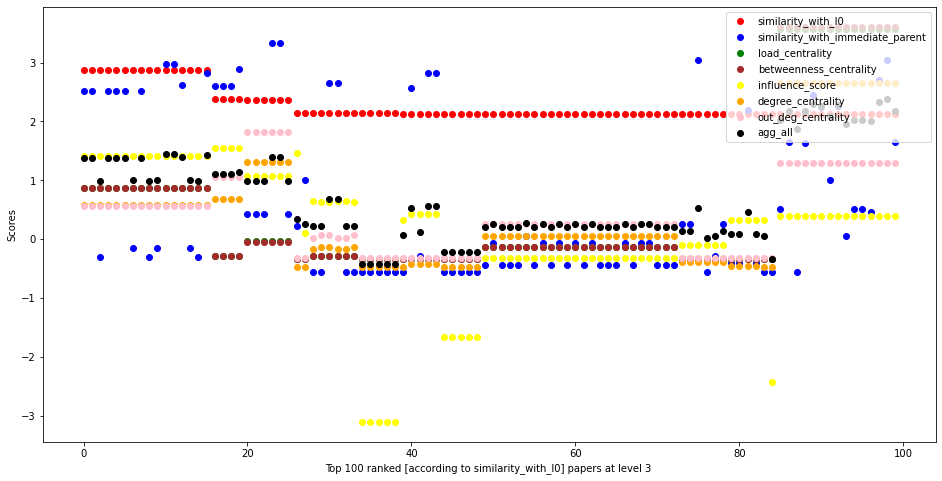

In [327]:
x = np.arange(len(level_3_topk))
fig, ax = plt.subplots(figsize=(16, 8))
plt.scatter(x, level_3_topk['similarity_with_l0'],
         label='similarity_with_l0', color='red')
plt.scatter(x, level_3_topk['similarity_with_immediate_parent'],
         label='similarity_with_immediate_parent', color='blue')
plt.scatter(x, level_3_topk['load_centrality'],
         label='load_centrality', color='green')
plt.scatter(x, level_3_topk['betweenness_centrality'],
         label='betweenness_centrality', color='brown')
plt.scatter(x, level_3_topk['influence_score'],
         label='influence_score', color='yellow')
plt.scatter(x, level_3_topk['degree_centrality'],
         label='degree_centrality', color='orange')
plt.scatter(x, level_3_topk['out_deg_centrality'],
         label='out_deg_centrality', color='pink')
plt.scatter(x, level_3_topk['Sum'], label='agg_all', color='black')
plt.xlabel(
    'Top 100 ranked [according to similarity_with_l0] papers at level 3 ')
plt.ylabel('Scores')
plt.legend(loc='upper right')
fig.set_facecolor('white')


In [329]:
level_3 = X_scaled_Agg[X_scaled_Agg['level_no'] == 3]
level_3_topk = level_3.sort_values(
    by="Sum", ascending=False)[sum_cols+['Sum']].head(100)
level_3_topk.fillna(0, inplace=True)
level_3_topk[:2]

,degree_centrality,out_deg_centrality,betweenness_centrality,load_centrality,similarity_with_l0,influence_score,similarity_with_immediate_parent,Sum
21103,21.085658,25.986412,3.003827,3.043055,-0.681125,0.815269,-0.564753,7.526906
10141,21.085658,25.986412,3.003827,3.043055,-0.681125,0.815269,-0.564753,7.526906


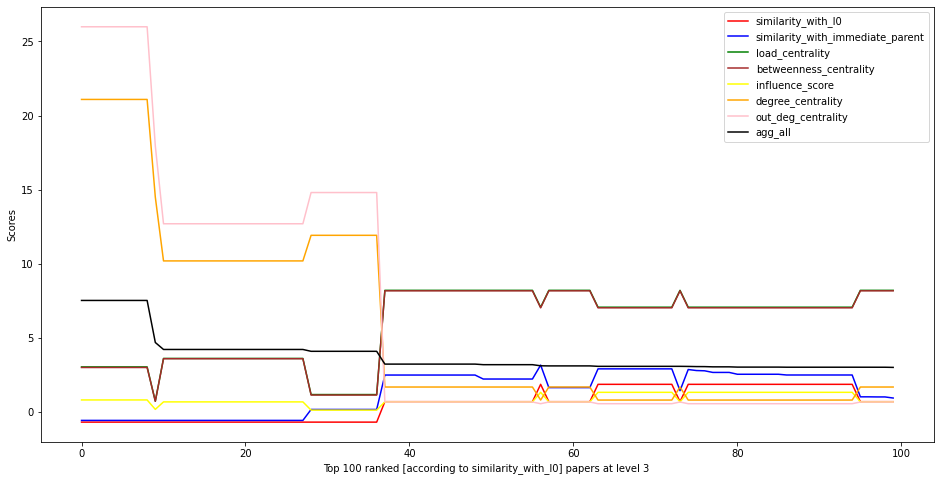

In [330]:
x = np.arange(len(level_3_topk))
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(x, level_3_topk['similarity_with_l0'],
         label='similarity_with_l0', color='red')
plt.plot(x, level_3_topk['similarity_with_immediate_parent'],
         label='similarity_with_immediate_parent', color='blue')
plt.plot(x, level_3_topk['load_centrality'],
         label='load_centrality', color='green')
plt.plot(x, level_3_topk['betweenness_centrality'],
         label='betweenness_centrality', color='brown')
plt.plot(x, level_3_topk['influence_score'],
         label='influence_score', color='yellow')
plt.plot(x, level_3_topk['degree_centrality'],
         label='degree_centrality', color='orange')
plt.plot(x, level_3_topk['out_deg_centrality'],
         label='out_deg_centrality', color='pink')
plt.plot(x, level_3_topk['Sum'], label='agg_all', color='black')
plt.xlabel(
    'Top 100 ranked [according to similarity_with_l0] papers at level 3 ')
plt.ylabel('Scores')
plt.legend(loc='upper right')
fig.set_facecolor('white')


In [335]:
X_scaled_Agg = X_scaled.copy()


In [340]:
sum_cols = ['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2', 'in_deg_centrality', 'similarity_with_immediate_parent', 'betweenness_centrality', 'load_centrality' , 'influence_score']

In [341]:
X_scaled_Agg['Sum'] = X_scaled[sum_cols].sum(axis=1)
X_scaled_Agg['Sum'] = X_scaled_Agg['Sum'] / len(sum_cols)
X_scaled_Agg


,similarity_with_l0,similarity_with_l1,similarity_with_l2,degree_centrality,closeness_centrality,in_deg_centrality,out_deg_centrality,influence_score,similarity_with_immediate_parent,betweenness_centrality,eigenvector_centrality,load_centrality,level_no,Sum
0,1.811142,-0.416602,-0.54362,0.870579,-0.323105,1.189375,0.446398,1.415389,1.968151,4.794454,-0.235964,4.813539,NaN,1.878978
1,0.672619,-0.416602,-0.54362,1.372817,-1.107308,-0.512237,1.939742,1.819337,0.811064,-0.286272,-0.235964,-0.285017,1.0,0.157409
2,-0.509287,-0.416602,-0.54362,0.242781,-1.107308,-0.512237,0.561271,1.070174,-0.390112,-0.300280,-0.235964,-0.299037,1.0,-0.237625
3,1.819523,-0.416602,-0.54362,1.498376,-0.945144,-0.216305,1.939742,1.724200,1.976668,0.157739,-0.235964,0.159781,1.0,0.582673
4,1.572820,-0.416602,-0.54362,0.933359,0.136628,1.781241,0.216653,1.134860,1.725943,0.377163,-0.235964,0.400264,1.0,0.754009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24320,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,0.636001,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.342525
24321,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,0.655203,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.340125
24322,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,-0.215323,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.448941
24323,-0.681125,-0.416602,-0.54362,-0.479186,-0.878225,-0.512237,-0.319419,-1.199078,-0.564753,-0.329329,-0.235964,-0.328538,3.0,-0.571910


In [342]:
level_3 = X_scaled_Agg[X_scaled_Agg['level_no'] == 3]
level_3_topk = level_3.sort_values(
    by="Sum", ascending=False)[sum_cols + ['Sum']].head(100)
level_3_topk.fillna(0, inplace=True)
level_3_topk[:2]


,similarity_with_l0,similarity_with_l1,similarity_with_l2,in_deg_centrality,similarity_with_immediate_parent,betweenness_centrality,load_centrality,influence_score,Sum
9996,1.868217,4.292748,3.023979,0.81946,2.912267,7.028593,7.06995,1.328535,3.542969
8799,1.868217,4.383006,2.598793,0.81946,2.497876,7.028593,7.06995,1.328535,3.449304


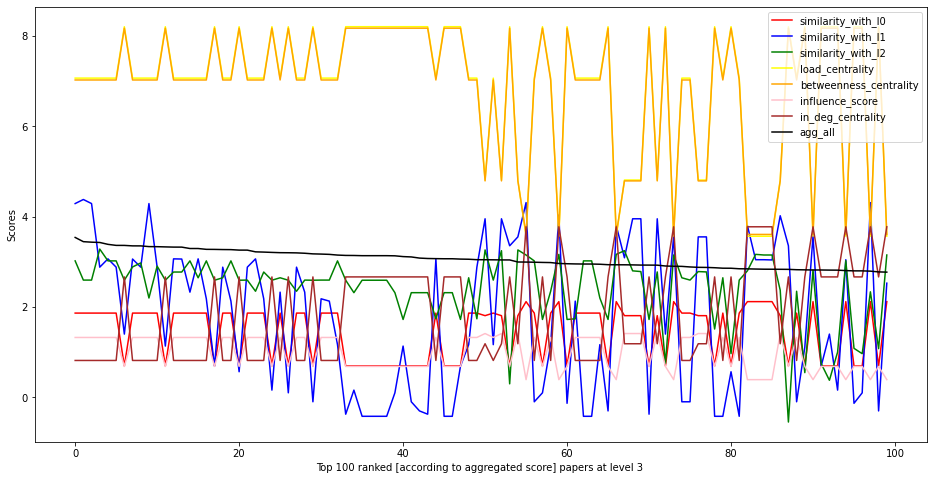

In [347]:
x = np.arange(len(level_3_topk))
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(x, level_3_topk['similarity_with_l0'],
         label='similarity_with_l0', color='red')
plt.plot(x, level_3_topk['similarity_with_l1'],
         label='similarity_with_l1', color='blue')
plt.plot(x, level_3_topk['similarity_with_l2'],
         label='similarity_with_l2', color='green')
# plt.plot(x, level_3_topk['similarity_with_immediate_parent'],
#          label='similarity_with_immediate_parent', color='brown')
plt.plot(x, level_3_topk['load_centrality'],
         label='load_centrality', color='yellow')
plt.plot(x, level_3_topk['betweenness_centrality'],
         label='betweenness_centrality', color='orange')
plt.plot(x, level_3_topk['influence_score'],
         label='influence_score', color='pink')
plt.plot(x, level_3_topk['in_deg_centrality'],
         label='in_deg_centrality', color='brown')

plt.plot(x, level_3_topk['Sum'], label='agg_all', color='black')
plt.xlabel(
    'Top 100 ranked [according to aggregated score] papers at level 3 ')
plt.ylabel('Scores')
plt.legend(loc='upper right')
fig.set_facecolor('white')


## HNSW